file intended to extract landmarks of the verify.jpg image for testing/visualization purposes

In [20]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
from draw_landmarks_mediapipe import draw_landmarks_on_image
import numpy as np
import pprint

In [88]:
img_path = "new_train_data/verify_working/verify.jpg"

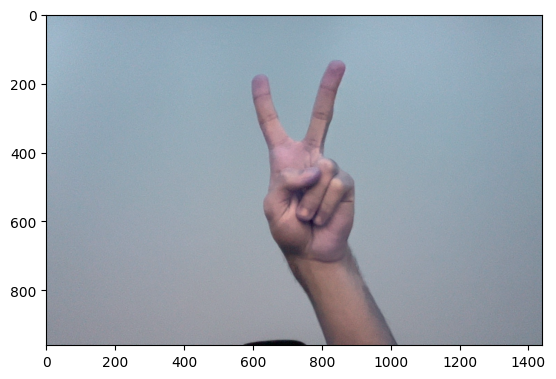

In [89]:
img = cv2.imread(img_path)
plt.imshow(img)

In [96]:
# specify where the pre-trained model is
base_options = mp.tasks.BaseOptions(model_asset_path='hand_landmarker.task')

# specify options such as handling only IMAGES, and only recognizing 2 hand
# the hand landmarker really fails to detect > 1 hand,
# so i chose a bruteforce method to interatively change confidence until it gets the # hands correctly (TRAINING ONLY, PREPROCESSING DATA ONLY)
options = mp.tasks.vision.HandLandmarkerOptions(base_options=base_options,
                                                    min_hand_detection_confidence=.5,
                                                    min_hand_presence_confidence=.5,
                                                    min_tracking_confidence=.5,
                                       num_hands=2, running_mode=mp.tasks.vision.RunningMode.IMAGE)
detector = mp.tasks.vision.HandLandmarker.create_from_options(options)

In [97]:
test_img = mp.Image.create_from_file(img_path)
# import PIL
# image = PIL.Image.open(img_path).convert('RGB')

# print(image)
# test_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
detection_result = detector.detect(test_img)

In [98]:
detection_result.handedness

[[Category(index=1, score=0.9995090961456299, display_name='Right', category_name='Right')]]

In [99]:
concat_displays = ''
hand_world_landmarks_tuples = np.zeros((2, 21, 3)) # left/right hand, 21 land marks, (x,y,z) pos

running_ind = 0
for handed in detection_result.handedness:
    display_name = handed[0].display_name
    if display_name == 'Left':
        ind = 0
    elif display_name == 'Right':
        ind = 1
    if concat_displays == '':
        concat_displays += display_name
    else:
        concat_displays += ', ' + display_name
    hand_world_landmarks_tuples[ind, :] = [(obj.x, obj.y, obj.z) for obj in detection_result.hand_world_landmarks[running_ind]]
    running_ind += 1

assert concat_displays != '', 'found no hands?'

print('caught ' + concat_displays + ' in the image')
print('position of the first landmark of the left hand:')
print(hand_world_landmarks_tuples[0][0])

# since it is not guaranteed for a left/right hand to be in the image, the np array is already padded
# which hopefully silences the layers using the left/right hand

# flatten the array to pass into the nn
flattened = hand_world_landmarks_tuples.reshape((1, 126))

print('[{}, {}, {}]'.format(flattened[0][0], flattened[0][1], flattened[0][2]))

caught Right in the image
position of the first landmark of the left hand:
[0. 0. 0.]
[0.0, 0.0, 0.0]


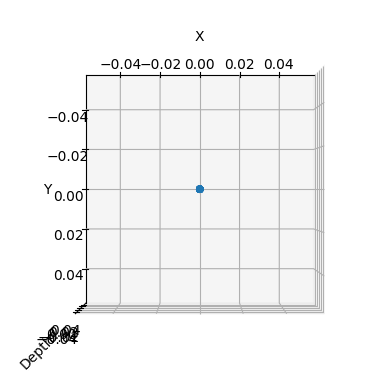

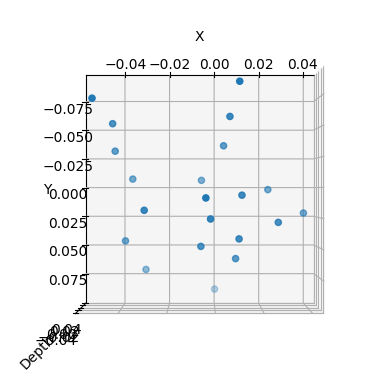

In [100]:
# hand_landmarks, hand_world_landmarks

for i in range(hand_world_landmarks_tuples.shape[0]):
    x, y, z = zip(*hand_world_landmarks_tuples[i])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth')
    ax.view_init(elev=-90, azim=-90)
    plt.show()

## the above plot looks like the number 3 which is what my hand showed.
i'm hoping that training a NN can recognize it as good as I can

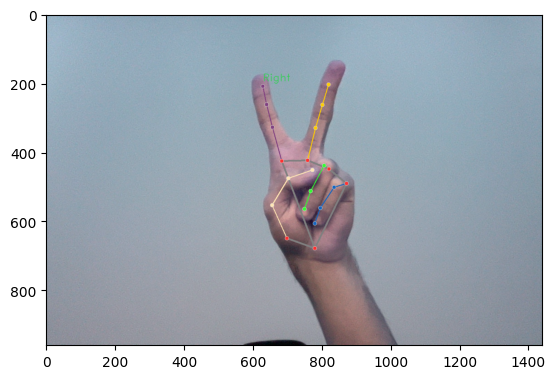

In [101]:
annotated_image = draw_landmarks_on_image(test_img.numpy_view(), detection_result)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [31]:
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(detection_result)

HandLandmarkerResult(handedness=[ [ Category(index=1,
                                             score=0.9996848106384277,
                                             display_name='Right',
                                             category_name='Right')]],
                     hand_landmarks=[ [ NormalizedLandmark(x=0.6294900178909302,
                                                           y=0.31177833676338196,
                                                           z=-1.7856571332686144e-07,
                                                           visibility=0.0,
                                                           presence=0.0),
                                        NormalizedLandmark(x=0.6426284313201904,
                                                           y=0.3683898448944092,
                                                           z=-0.031218407675623894,
                                                           visibility=0.0,
                  

In [32]:
str([x[0].display_name for x in detection_result.handedness]) + ' hand was shown in the image'

"['Right'] hand was shown in the image"